In [30]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D,  BatchNormalization, Add, Activation, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D
from keras.optimizers import Adam
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [31]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
# Path to the main flower dataset folder
dataset_folder = 'Fruits\Banana'


In [33]:
# List of class names
class_names = ['Banana Black Sigatoka Disease', 'Banana Bract Mosaic Virus Disease', 'Banana Healthy Leaf', 'Banana Insect Pest Disease', 'Banana Moko Disease','Banana Panama Disease','Banana Yellow Sigatoka Disease']


In [34]:
# Load and preprocess images
data = []
labels = []

for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_folder, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        img = img.resize((32, 32))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_idx)

In [35]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [36]:

# Print the shapes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1827, 32, 32, 3)
y_train shape: (1827,)
x_val shape (457, 32, 32, 3)
y_val shape : (457,)
x_test shape: (572, 32, 32, 3)
y_test shape: (572,)


In [37]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0
     

In [39]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 7)
y_val = keras.utils.to_categorical(y_val, 7)
y_test = keras.utils.to_categorical(y_test, 7)
     

In [40]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)

In [41]:

from tensorflow.keras import layers, Sequential
from keras import applications 
from tensorflow.keras.optimizers import SGD
from keras.layers  import Input
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam

In [45]:
#custom Model
customModel = Sequential()
customModel=Sequential(
    [
        layers.Conv2D(512,3,input_shape=(32,32,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(7,activation='softmax'),
    ]
)
customModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
customModel.summary()
     

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 512)       14336     
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 512)       2048      
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 512)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 256)       1179904   
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 256)      

In [46]:
y_train.shape

(1827, 7)

In [47]:
history = customModel.fit(
    x_train,y_train,
    epochs=35,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])


Epoch 1/35
58/58 [==============================] - ETA: 0s - loss: 1.2583 - accuracy: 0.4685

c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/58 [==============================] - 84s 1s/step - loss: 1.2583 - accuracy: 0.4685 - val_loss: 2.0230 - val_accuracy: 0.2101
Epoch 2/35
58/58 [==============================] - 72s 1s/step - loss: 1.0746 - accuracy: 0.5495 - val_loss: 2.6388 - val_accuracy: 0.2101
Epoch 3/35
58/58 [==============================] - 67s 1s/step - loss: 1.0488 - accuracy: 0.5583 - val_loss: 2.8330 - val_accuracy: 0.2101
Epoch 4/35
58/58 [==============================] - 71s 1s/step - loss: 0.9784 - accuracy: 0.6108 - val_loss: 2.5326 - val_accuracy: 0.2429
Epoch 5/35
58/58 [==============================] - 68s 1s/step - loss: 0.9411 - accuracy: 0.6125 - val_loss: 5.4773 - val_accuracy: 0.2101
Epoch 6/35
58/58 [==============================] - 66s 1s/step - loss: 0.9005 - accuracy: 0.6344 - val_loss: 2.2066 - val_accuracy: 0.2998
Epoch 7/35
58/58 [==============================] - 66s 1s/step - loss: 0.9251 - accuracy: 0.6284 - val_loss: 3.2748 - val_accuracy: 0.2976
Epoch 8/35
58/58 [=============

In [48]:
val_loss, val_acc = customModel.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)

15/15 [==============================] - 4s 294ms/step - loss: 0.6693 - accuracy: 0.7768
Validation accuracy :  0.7768052220344543


In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


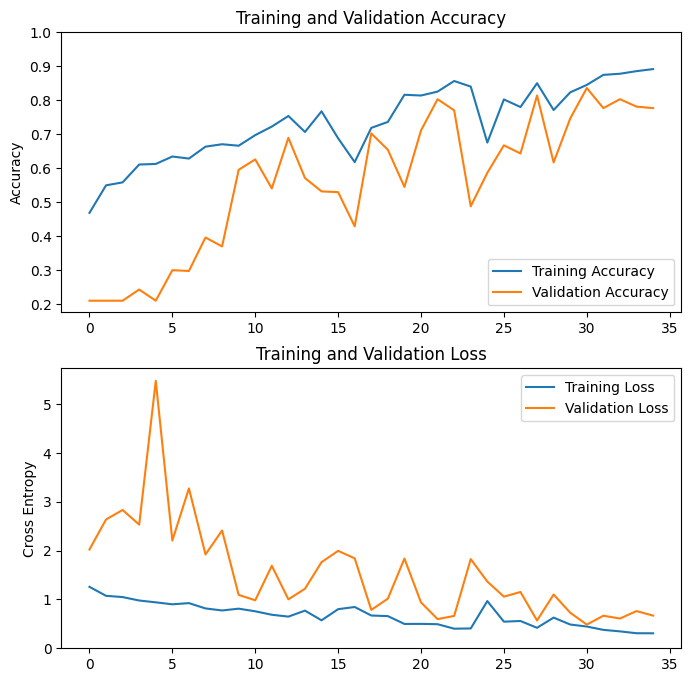

In [50]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [51]:
import pandas as pd
import seaborn as sns
     

15/15 [==============================] - 4s 277ms/step


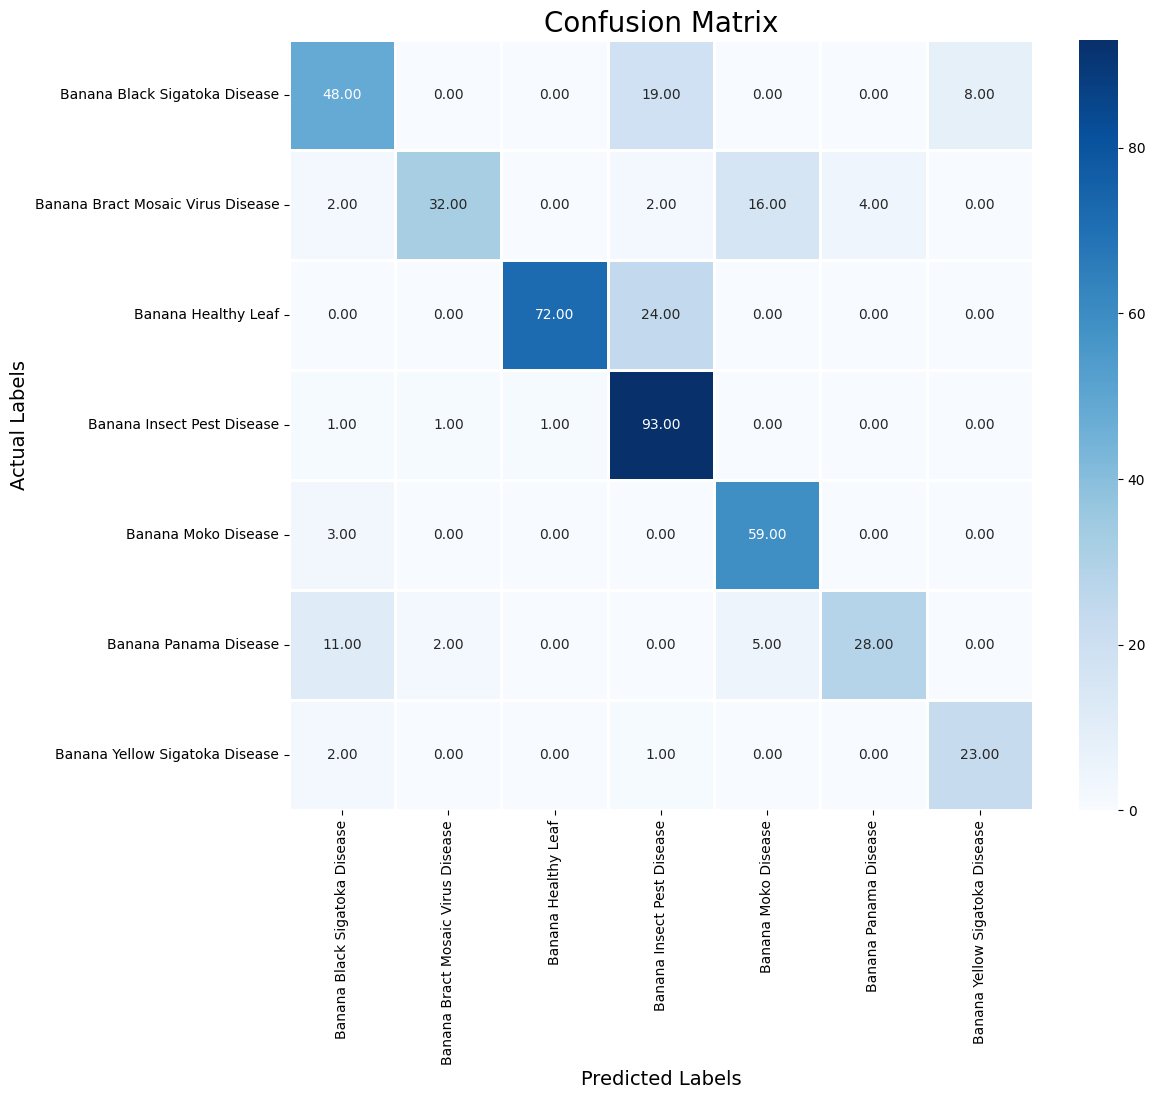

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        75
           1       0.91      0.57      0.70        56
           2       0.99      0.75      0.85        96
           3       0.67      0.97      0.79        96
           4       0.74      0.95      0.83        62
           5       0.88      0.61      0.72        46
           6       0.74      0.88      0.81        26

    accuracy                           0.78       457
   macro avg       0.81      0.77      0.77       457
weighted avg       0.81      0.78      0.77       457



In [52]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))

In [53]:
score = customModel.evaluate(x_test, y_test)
     

18/18 [==============================] - 5s 277ms/step - loss: 0.7015 - accuracy: 0.7640


In [54]:

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.7014825940132141
Test accuracy: 0.7639859914779663


In [55]:

customModel.save('Banana_Saved_Model')

INFO:tensorflow:Assets written to: Banana_Saved_Model\assets


INFO:tensorflow:Assets written to: Banana_Saved_Model\assets


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import tensorflow as tf
model = tf.keras.models.load_model('Saved_Model')

In [ ]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    
    # Convert to RGB in case the image has an alpha channel
    img = img.convert('RGB')
    
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [ ]:
# List of class names
class_names = ['Banana Black Sigatoka Disease', 'Banana Bract Mosaic Virus Disease', 'Banana Healthy Leaf', 'Banana Insect Pest Disease', 'Banana Moko Disease','Banana Panama Disease','Banana Yellow Sigatoka Disease']


In [ ]:
# Predict the class
image_path = 'flowers/rose/12240303_80d87f77a3_n.jpg'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)